<b>Importing Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>Importing Data</b>

In [2]:
df= pd.read_csv('C:/Users/b_min/Desktop/drinks.csv')

<b>Exploratory Data Analysis</b>

The <code>head()</code> method displays the first 5 columns of the dataframe df.

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


The attribute <code>dtypes</code> will show the data types of each column.

In [4]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Now, we calculate the total wine_servings per continent using the <code>groupby</code> function along with <code>sum()</code>

<i> We discover that Europe has the highest wine, beer, and spirit servings</i>

In [5]:
df.groupby('continent')['wine_servings','beer_servings','spirit_servings'].sum()

,wine_servings,beer_servings,spirit_servings
continent,,,
Africa,862,3258,866
Asia,399,1630,2677
Europe,6400,8720,5965
North America,564,3345,3812
Oceania,570,1435,935
South America,749,2101,1377


Using <code>value_counts()</code> we can summarize the categorical data points. 

In [6]:
df["continent"].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

Calculating the statistical summary for beer_servings per continent using <code>describe()</code> function. 

<i> If needed, we can caluclate statistical summary for other columns as well using a similar approach</i>

In [7]:
df.groupby('continent')['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


Another method to understand the distribution of numeric columns is using <code>boxplot()</code> from the seaborn library.

In the <code>boxplot</code> output we see results similar to our output from <code>desribe()</code>

<i>The matplotlib library has been used to adjust the size</i>

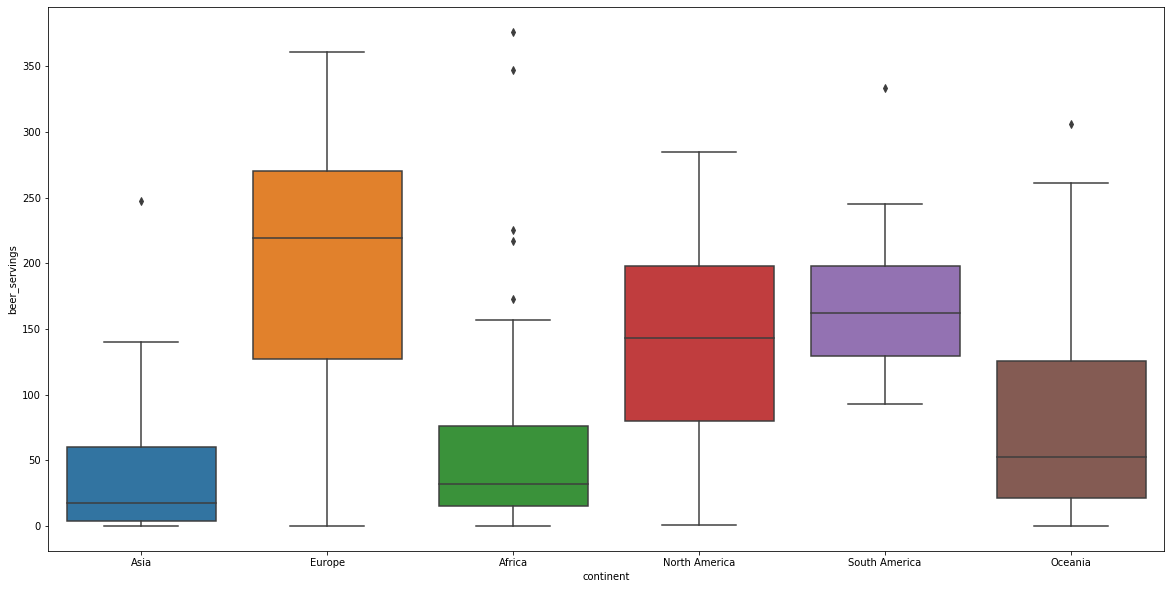

In [8]:
import seaborn as sns

plt.figure(figsize = (20,10))


sns.boxplot(x="continent",y="beer_servings", data=df)

<b> Variable Selection</b>

We analyze the correlation between the different types of alcohol and the total_litres_of_pure_alcohol using the <code>pairplot()</code> in the seaborn library.

<i> We see a positive linear relationship for all three, however, beer_servings and total_litres_of_pure_alcohol have the best relationship</i> 

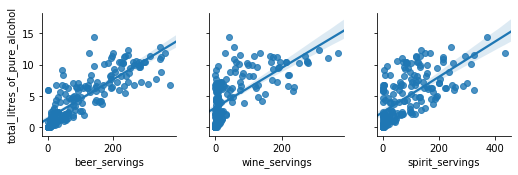

In [26]:
sns.pairplot(df,
            x_vars=["beer_servings","wine_servings","spirit_servings"],
            y_vars=["total_litres_of_pure_alcohol"],
            kind="reg")

<b>Model Development: Simple Linear Regression</b>

Fitting a simple linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'beer_servings'</code> then calculate $R^{2}$:

1. Import linear_model from scikit-learn
2. Creating a Linear Regression Object
3. Defining target variable (y) and predictor variable(x)

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['beer_servings']]
y = df['total_litres_of_pure_alcohol']

Fit the model using lm.fit

In [35]:
model = lm.fit(x, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lm.intercept_

1.4067726033222185

In [37]:
lm.coef_

array([0.03118224])

Simple Linear Regression Equation

total_litres_of_pure_alcohol = 1.40 + 0.031*beer_servings

We can obtain a prediction of the first five values of total_litres_of_pure_alcohol using <code>predict()</code>

In [38]:
yhat=lm.predict(x)
yhat[0:5]

array([1.4067726 , 4.18199184, 2.18632857, 9.04642107, 8.17331839])

<b>Model Evaluation</b>

Numerical Evaluation

<i> The R squared value is close to one, hence, it can be said that the model is a good fit.<br> 
    In this case 70% of the variation in total_litres_of_pure_alcohol is explained by beer_servings.</i>

In [39]:
lm.score(x,y)

0.6986262119487155

Visual Evaluation

The residual plot display that the data is randomly spread around the x-axis. Hence the model is appropritate.

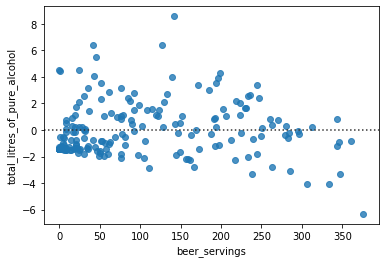

In [40]:
sns.residplot(df['beer_servings'],df['total_litres_of_pure_alcohol'])

<b>Model Development: Multiple Linear Regression</b>

Firstly, we will split our data set into training and test subsets to evaluate how the model will perform on new/unseen data.

1. The <code>train_test_split</code> function has been imported from sklearn 
2. The independent and dependent variables have been defined.

<i>Some commands have been repeated</i>

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
z = df[['wine_servings','beer_servings','spirit_servings']]
y = df['total_litres_of_pure_alcohol']

Splitting the data into training and testing subsets

In [43]:
z_train, z_test, b_train, b_test = train_test_split(z, y, test_size=0.3, random_state=0)
print(z_train.shape, b_train.shape)
print(z_test.shape, b_test.shape)

(135, 3) (135,)
(58, 3) (58,)


Fitting the model onto the training subset

In [45]:
lm2 = LinearRegression()
model2 = lm2.fit(z_train, b_train)

In [29]:
lm2.intercept_

0.47794152102750775

In [31]:
lm2.coef_

array([0.01658151, 0.01811791, 0.01695469])

Multiple Linear Regression Equation<br>
total_litres_of_pure_alcohol = 0.48 + 0.017 * wine_servings + 0.018 * beer_servings + 0.017 * spirit_servings

We can obtain a prediction of the first five values of total_litres_of_pure_alcohol using <code>predict()</code> on the test subset

In [55]:
a = lm2.predict(z_test)[0:5]
a

array([0.47794152, 4.93446614, 8.44131239, 0.58278613, 0.47794152])

<b>Model Evaluation</b>

Numerical Evaluation on the test data <br>

<i> The R squared value is close to one, hence, it can be said that the model is a good fit.<br> 
    In this case 75% of the variation in total_litres_of_pure_alcohol is explained by the independent varaibles.</i>

In [51]:
lm2.score(z_test,b_test)

0.7549608066333017

Visual Evaluation on test data

<i> It can be observed that our predicted values are very close to the actual values, hence, it's a good model. </i>

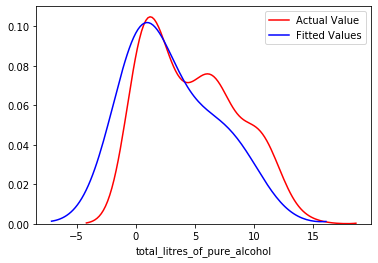

In [56]:
ax1 = sns.distplot(df['total_litres_of_pure_alcohol'], hist=False, color='r', label='Actual Value')

sns.distplot(a, hist=False, color='b', label='Fitted Values', ax=ax1)